## Martin Dionne

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [1]:
import numpy as np

def matrix_multiply(A,B):
    A = np.array(A)
    B = np.array(B)
    
    if np.size(A,1) == np.size(B,0):
        n,m = np.size(A,0), np.size(B,1)
        res = np.zeros((n,m))

        for i in range(0,n):
            for j in range(m):
                tot = 0
                for k in range(np.size(B,0)):
                    tot += B[:, j][k] * A[i, :][k]
                res[i,j] = tot

        return res
    else:
        raise Exception("matrices dimensions does not fit")

In [2]:
A = [[1,2,3],[4,5,6]]
B = [[1,2,3],[4,5,6],[7,8,9]]

print(matrix_multiply(A,B)) # [[30, 36, 42], [66, 81, 96]]
np.dot(A, B)

[[30. 36. 42.]
 [66. 81. 96.]]


array([[30, 36, 42],
       [66, 81, 96]])

In [3]:
A = [[1,2,3]]
B = [[1],[4],[7]]

print(matrix_multiply(A,B)) # [[30]]
np.dot(A, B)

[[30.]]


array([[30]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [4]:
# 2.1 Give a 3 examples of non-invertible square matrices that are non-zero

A = [[1,0],[0,0]]   #np.linalg.inv(A) gives an error (non invertible)
B = [[4,6],[4,6]]   #np.linalg.inv(B) gives an error (non invertible)
C = [[1,2],[-2,-4]] #np.linalg.inv(C) gives an error (non invertible)

In [5]:
# 2.2 Explain why the identity matrix is necessarily a square matrix with only 1's on the diagonal
M = [[1,2,3],[4,5,6],[7,8,9]]
I = [[1,0,0],[0,1,0],[0,0,1]]
np.dot(M,I) 

# Matrix * Identity matrix always return the inital Matrix
# the diagonal of 1's ensure that the intital value will be conserved in the output
# since the dot product use the sum of products, all other products must be 0 
# hence the identity matrix must be the same size of the matrix and contains only 1's on the diagonal

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
# 2.3 The trace is commutative for two matrices. Give an example where this is false for 3 matrices

A = np.array([[3,2,1],[6,9,9],[1,6,3]])
B = np.array([[8,2,3],[4,4,4],[9,3,7]])
C = np.array([[6,2,3],[8,5,2],[7,1,2]])

print(np.trace(A @ B @ C))
print(np.trace(A @ C @ B))

1715
1811


In [7]:
# 2.4 Give an example of a nonzero 4×4 idempotent matrix

idempotent = np.array([[4, -1, 0, 0],
                       [12, -3, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 0]])

np.dot(idempotent,idempotent)

array([[ 4, -1,  0,  0],
       [12, -3,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  0]])

In [8]:
# 2.5 solve the following system of equations for x, y and z using matrices and np.linalg.solve

Coeff = [[1,1,1],[0,2,5],[2,5,-1]]
Y = [6,-4,27]
X = np.linalg.inv(Coeff).dot(Y)
X

array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import statsmodels.api as sm

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df = df.drop(columns=['INDUS', 'AGE'])

y = load_boston().target
# add constant term (intercept)
X = sm.add_constant(df) 
est = sm.OLS(y, X).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          4.39e-121
Time:                        22:32:58   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      7.878      4.613      0.000      20.900      51.782
CRIM          -0.1084      0.031     -3.513      0.000      -0.169      -0.048
ZN             0.0458      0.014      3.386      0.001       0.019       0.072
CHAS           2.7187      1.312      2.072      0.038       0.148       5.290
NOX          -17.3760      3.339     -5.204      0.000     -23.920     -10.832
RM             3.8016      0.798      4.765      0.000       2.238       5.365
DIS           -1.4927      0.223     -6.698      0.000      -1.929      -1.056
RAD            0.2996      0.062      4.852      0.000       0.179       0.421
TAX           -0.0118      0.003     -4.103      0.000      -0.017      -0.006
PTRATIO       -0.9465      0.113     -8.363      0.000      -1.168      -0.725
B              0.0093      0.003      3.449      0.001       0.004       0.015
LSTAT         -0.5226      0.086     -6.086      0.000      -0.691      -0.354
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [10]:
#sns.pairplot(tmp)
# CRIM, DIS, LSTAT could potentialy benefit from a polynomial model 
#sns.lmplot(x="CRIM", y="MEDV", data=df, order=2)
#sns.lmplot(x="DIS", y="MEDV", data=df, order=2
#sns.lmplot(x="LSTAT", y="MEDV", data=df, order=3)

In [11]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
# remove features with p value > 0.05
df = df.drop(columns=['INDUS', 'AGE', 'ZN']) 
df['MEDV'] = load_boston().target

df['CRIM_2'] = df.CRIM ** 2
#df['CRIM_3'] = df.CRIM ** 3
df['DIS_2'] = df.DIS ** 2
#df['DIS_3'] = df.DIS ** 3
df['LSTAT_2'] = df.LSTAT ** 2
df['LSTAT_3'] = df.LSTAT ** 3

y = df['MEDV']
X = df.drop(columns=['MEDV'])

est = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          3.80e-147
Time:                        22:32:58   Log-Likelihood:                -1433.6
No. Observations:                 506   AIC:                             2897.
Df Residuals:                     491   BIC:                             2961.
Df Model:                          14                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.3956      8.767      6.775      0.000      42.212      76.579
CRIM          -0.3882      0.097     -4.005      0.000      -0.578      -0.198
CHAS           2.3698      1.130      2.098      0.036       0.156       4.584
NOX          -21.1393      3.260     -6.485      0.000     -27.528     -14.750
RM             2.8477      0.715      3.980      0.000       1.445       4.250
DIS           -3.7253      0.680     -5.479      0.000      -5.058      -2.393
RAD            0.3896      0.067      5.805      0.000       0.258       0.521
TAX           -0.0124      0.003     -4.640      0.000      -0.018      -0.007
PTRATIO       -0.8901      0.108     -8.272      0.000      -1.101      -0.679
B              0.0072      0.002      3.185      0.001       0.003       0.012
LSTAT         -2.3409      0.402     -5.816      0.000      -3.130      -1.552
CRIM_2         0.0030      0.001      2.221      0.026       0.000       0.006
DIS_2          0.2164      0.054      4.007      0.000       0.111       0.322
LSTAT_2        0.0776      0.023      3.386      0.001       0.033       0.123
LSTAT_3       -0.0008      0.000     -2.010      0.044      -0.002   -2.07e-05
==============================================================================
Omnibus:                      110.741   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.590
Skew:                           0.906   Prob(JB):                    1.96e-104
Kurtosis:                       7.401   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

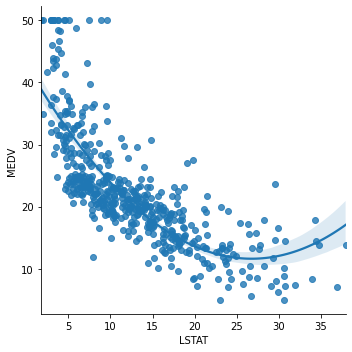

In [12]:
sns.lmplot(x="LSTAT", y="MEDV", data=df, order=2)

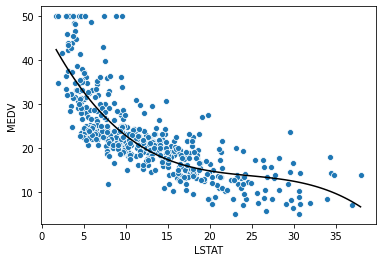

In [13]:
x = df.LSTAT
fmin, fmax = df.LSTAT.min(), df.LSTAT.max()
coefs = np.polyfit(x, y, 3)
sns.scatterplot(x,y)

xfit = np.linspace(fmin, fmax, 100)
yfit = np.polyval(coefs, xfit)
sns.lineplot(xfit, yfit, color="black")

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [14]:
def reg_plot_on_ax(feature, ax, degree=1):
    x = df[feature]
    fmin, fmax = df[feature].min(), df[feature].max()
    coefs = np.polyfit(x, y, degree)
    sns.scatterplot(x, y, ax=ax)
    
    xfit = np.linspace(fmin, fmax, 100)
    yfit = np.polyval(coefs, xfit)
    sns.lineplot(xfit, yfit, color="black", ax=ax)

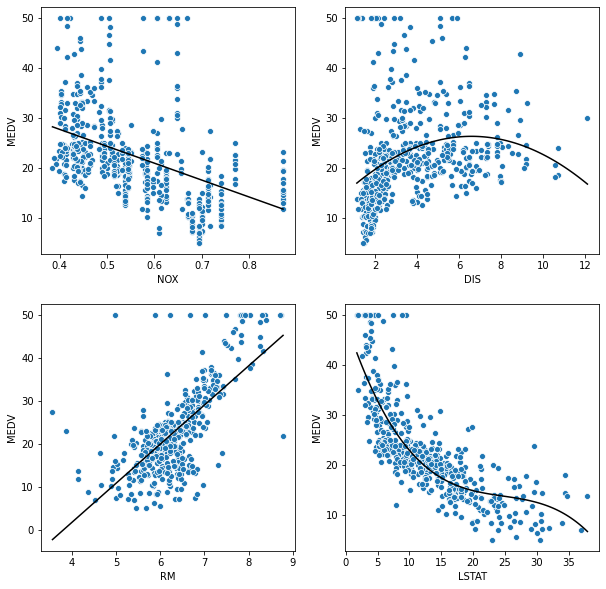

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
reg_plot_on_ax('NOX', ax1)
reg_plot_on_ax('DIS', ax2, 2)
reg_plot_on_ax('RM', ax3)
reg_plot_on_ax('LSTAT', ax4, 3)
